## import the libraries

In [31]:
import math
import numpy as np
import pandas as pd
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [10]:
df= pd.read_csv('DataFrame.csv')
df

,Type,Date,Time,open,high,low,close,Unnamed: 7
0,NIFTY,20210101,09:16,13997.90,14020.85,13991.35,14013.15,NaN
1,NIFTY,20210101,09:17,14014.85,14018.55,14008.15,14009.05,NaN
2,NIFTY,20210101,09:18,14008.05,14013.10,14005.05,14012.70,NaN
3,NIFTY,20210101,09:19,14013.65,14019.10,14013.65,14016.20,NaN
4,NIFTY,20210101,09:20,14015.45,14017.80,14011.95,14015.45,NaN
...,...,...,...,...,...,...,...,...
22800,NIFTY,20210331,15:27,14687.35,14694.35,14686.30,14690.60,NaN
22801,NIFTY,20210331,15:28,14690.90,14690.90,14686.05,14689.30,NaN
22802,NIFTY,20210331,15:29,14690.30,14694.10,14688.55,14691.30,NaN
22803,NIFTY,20210331,15:30,14689.85,14693.55,14689.45,14693.05,NaN


In [11]:
df.head()

,Type,Date,Time,open,high,low,close,Unnamed: 7
0,NIFTY,20210101,09:16,13997.90,14020.85,13991.35,14013.15,NaN
1,NIFTY,20210101,09:17,14014.85,14018.55,14008.15,14009.05,NaN
2,NIFTY,20210101,09:18,14008.05,14013.10,14005.05,14012.70,NaN
3,NIFTY,20210101,09:19,14013.65,14019.10,14013.65,14016.20,NaN
4,NIFTY,20210101,09:20,14015.45,14017.80,14011.95,14015.45,NaN


In [12]:
df.tail()

,Type,Date,Time,open,high,low,close,Unnamed: 7
22800,NIFTY,20210331,15:27,14687.35,14694.35,14686.30,14690.60,NaN
22801,NIFTY,20210331,15:28,14690.90,14690.90,14686.05,14689.30,NaN
22802,NIFTY,20210331,15:29,14690.30,14694.10,14688.55,14691.30,NaN
22803,NIFTY,20210331,15:30,14689.85,14693.55,14689.45,14693.05,NaN
22804,NIFTY,20210331,15:31,14690.70,14690.70,14690.70,14690.70,NaN


In [14]:
df.shape

(22805, 8)

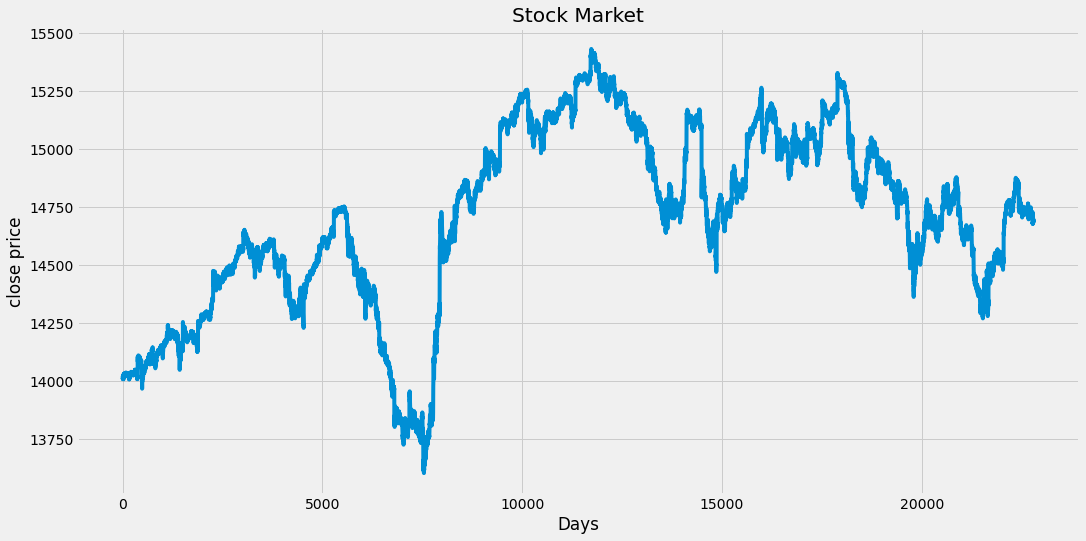

In [15]:
plt.figure(figsize=(16,8))
plt.title('Stock Market')
plt.xlabel('Days')
plt.ylabel('close price')
plt.plot(df['close'])
plt.show()

In [19]:
df=df[['close']]
df.head()

,close
0,14013.15
1,14009.05
2,14012.70
3,14016.20
4,14015.45


In [20]:
future_days = 30
df['prediction'] = df[['close']].shift(-future_days)
df.head()

<ipython-input-20-8575266d2695>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prediction'] = df[['close']].shift(-future_days)


,close,prediction
0,14013.15,14030.90
1,14009.05,14030.00
2,14012.70,14030.40
3,14016.20,14030.75
4,14015.45,14030.65


In [21]:
future_days = 30
df['prediction'] = df[['close']].shift(-future_days)
df.tail()

<ipython-input-21-e582e48eeabe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prediction'] = df[['close']].shift(-future_days)


,close,prediction
22800,14690.60,NaN
22801,14689.30,NaN
22802,14691.30,NaN
22803,14693.05,NaN
22804,14690.70,NaN


In [23]:
X = np.array(df.drop(['prediction'], 1))[:-future_days]

In [24]:
print(X)

[[14013.15]
 [14009.05]
 [14012.7 ]
 ...
 [14723.2 ]
 [14726.85]
 [14697.8 ]]


In [25]:
y = np.array(df['prediction'])[:-future_days]
print(y)

[14030.9  14030.   14030.4  ... 14691.3  14693.05 14690.7 ]


In [30]:
x_train , x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [32]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [33]:
x_future = df.drop(['prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[14700.7 ],
       [14708.15],
       [14713.3 ],
       [14712.85],
       [14718.05],
       [14717.75],
       [14713.35],
       [14709.35],
       [14700.75],
       [14706.85],
       [14711.65],
       [14709.45],
       [14704.8 ],
       [14710.4 ],
       [14714.4 ],
       [14709.4 ],
       [14711.6 ],
       [14710.  ],
       [14707.55],
       [14712.2 ],
       [14714.65],
       [14716.65],
       [14718.25],
       [14719.6 ],
       [14712.6 ],
       [14713.35],
       [14728.2 ],
       [14723.2 ],
       [14726.85],
       [14697.8 ]])

In [35]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()

lr_prediction = lr.predict(x_future)
print(lr_prediction)

[14649.525 14677.55  14709.675 14682.6   14754.925 14712.225 14693.7
 14685.625 14700.35  14695.8   14722.65  14715.05  14683.95  14722.25
 14692.85  14685.625 14715.55  14741.45  14686.7   14687.95  14747.85
 14726.45  14685.15  14687.75  14671.35  14693.7   14707.    14666.95
 14776.975 14708.075]

[14701.37055316 14708.74982032 14713.85092447 14713.40519692
 14718.55582635 14718.25867465 14713.90044975 14709.93842711
 14701.42007844 14707.46216297 14712.21659013 14710.03747768
 14705.43162636 14710.97845806 14714.94048069 14709.9879524
 14712.16706485 14710.58225579 14708.15551693 14712.76136824
 14715.18810711 14717.16911843 14718.75392748 14720.09111012
 14713.15757051 14713.90044975 14728.60945879 14723.6569305
 14727.27227615 14698.49808675]


<ipython-input-44-11a76490dabe>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


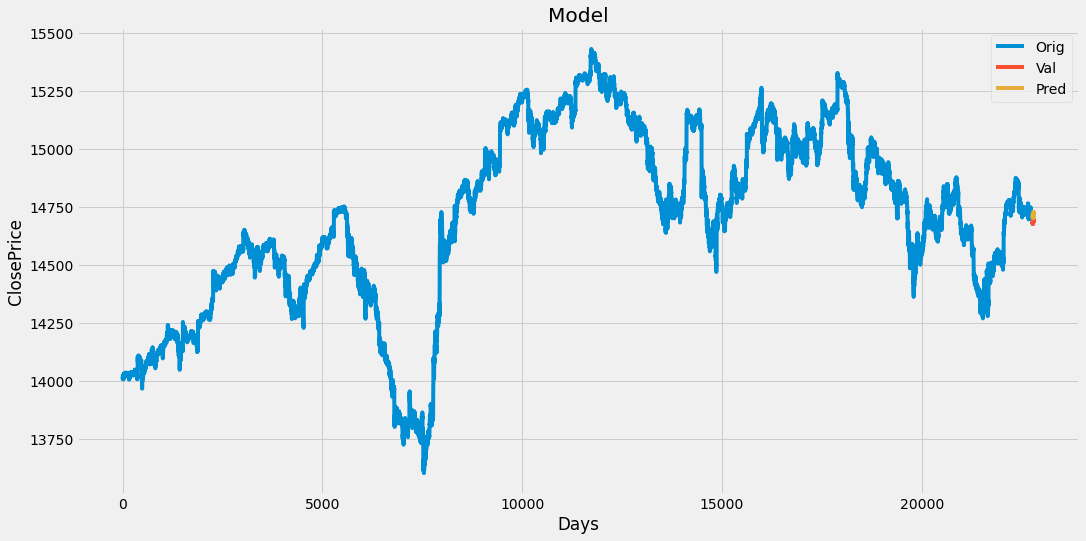

In [44]:
predictions = lr_prediction

valid = df[X.shape[0]:]
valid['predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('ClosePrice')
plt.plot(df['close'])
plt.plot(valid[['close' , 'predictions']])
plt.legend(['Orig', 'Val' , 'Pred'])
plt.show()